In [1]:
from collections import defaultdict

import numpy as np
from scipy.stats import mannwhitneyu
from scipy.stats import uniform, norm

from matplotlib import pyplot as plt

from common import simple_heuristics, make_mw_heuristics

In [2]:
class NormalDrugGenerator:
    def generate(self, rng):
        mean = -np.log(rng.rand())
        std = 1 + rng.rand()
        return norm(mean, std)

def simulate(
    accept_heuristics, control_distribution, drug_generator, rng,
    n_trials=100, sample_size=100
):
    current_drug = control_distribution
    progress = [current_drug.mean()]
    for trial in range(n_trials):
        new_drug = drug_generator.generate(rng)
        control_sample = current_drug.rvs(sample_size, rng)
        test_sample = new_drug.rvs(sample_size, rng)
        if accept_heuristics(test_sample, control_sample):
            current_drug = new_drug
        progress.append(current_drug.mean())
    return progress


In [3]:
contron_distribution = norm(0, 1)
n_runs = 10
n_trials = 100
sample_size = 100
strategies = {
    "simple": simple_heuristics,
    "mw_0.1": make_mw_heuristics(0.1),
    "mw_0.05": make_mw_heuristics(0.05),
    "mw_0.01": make_mw_heuristics(0.01)
}
colors = ["gray", "green", "blue", "red"]
drug_generator = NormalDrugGenerator()
rnd_state = np.random.RandomState(0)

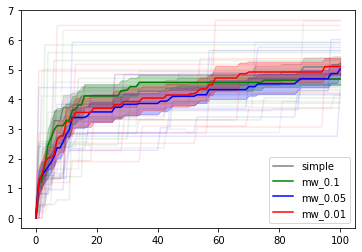

In [4]:
for color, (name, heuristics) in zip(colors, strategies.items()):
    trajectories = []
    for _ in range(n_runs):
        progress = simulate(
            heuristics, contron_distribution, drug_generator, rnd_state,
            n_trials=n_trials, sample_size=sample_size)
        trajectories.append(progress)

    mean_traj = np.mean(trajectories, axis=0)
    errors = np.std(trajectories, axis=0, ddof=1) / np.sqrt(n_runs)
    x = np.arange(n_trials + 1)
    plt.plot(mean_traj, color=color, label = name)
    plt.fill_between(x, mean_traj - errors, mean_traj + errors, color=color, alpha=0.25)
    for traj in trajectories:
        plt.plot(traj, color=color, alpha=0.1)

plt.legend()
plt.show()